In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


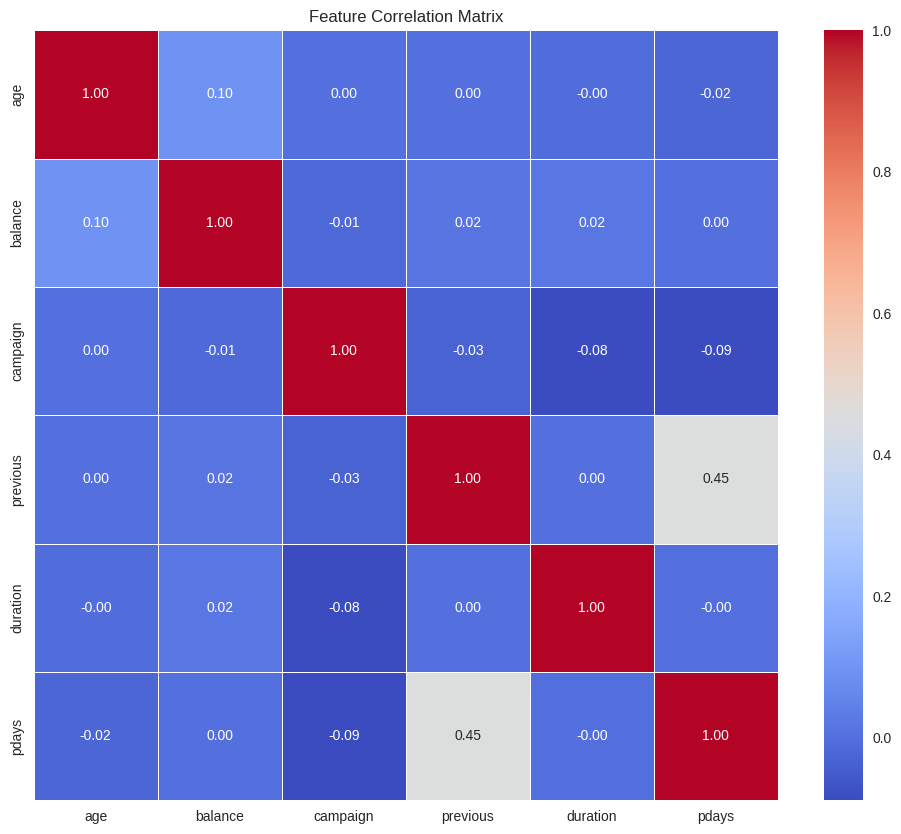

In [7]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

# Calculate the correlation matrix for the preprocessed data
numerical_features = ['age', 'balance', 'campaign', 'previous', 'duration', 'pdays']
correlation_matrix = data[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [10]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                # If a cluster becomes empty, keep its centroid unchanged.
                # In a more robust implementation, one might reinitialize.
                new_centroids[i] = self.centroids[0] # Keep old centroid
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        np.random.seed(self.random_state) # Ensure reproducibility for centroid initialization
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, self.labels)

            # Check for convergence: if centroids haven't changed significantly
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

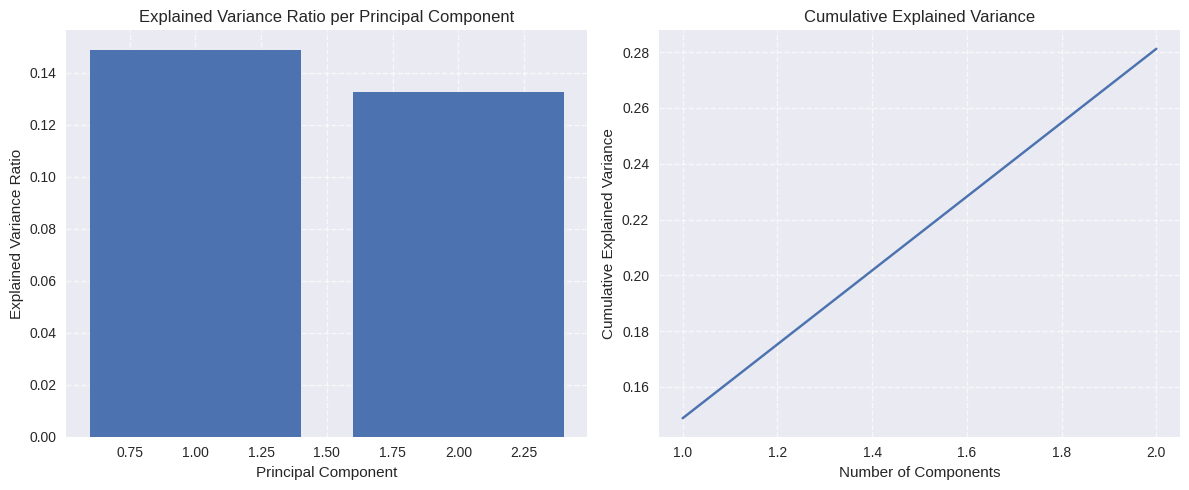

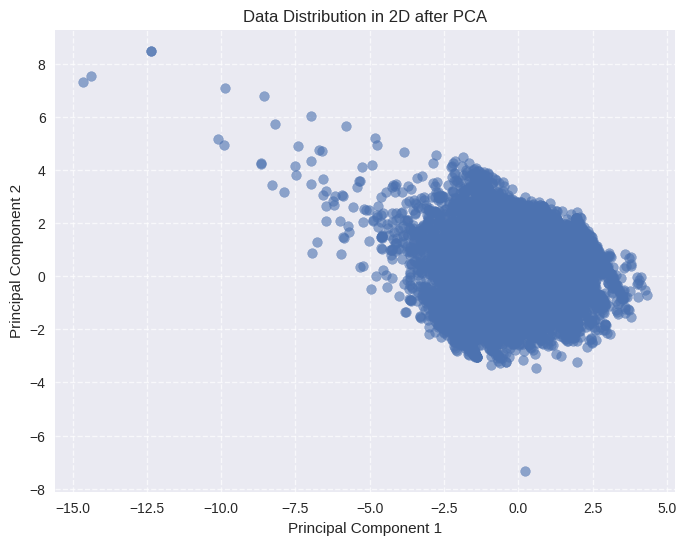

Cumulative variance: [0.14878447 0.28119349]
Variance explained by first 2 PCs: 0.2811934910881573
Shape after PCA: (45211, 2)


In [20]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 5))

    # Plot explained variance ratio
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio per Principal Component')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plot cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Plot data in 2D if n_components is 2
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('Data Distribution in 2D after PCA')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
        print(f"Cumulative variance: {np.cumsum(pca.explained_variance_ratio_)}")
        print("Variance explained by first 2 PCs:", pca.explained_variance_ratio_[:2].sum())



    return X_pca


# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Plotting elbow curve...


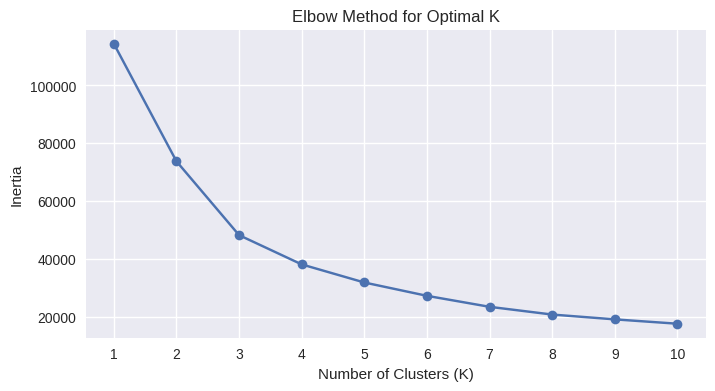

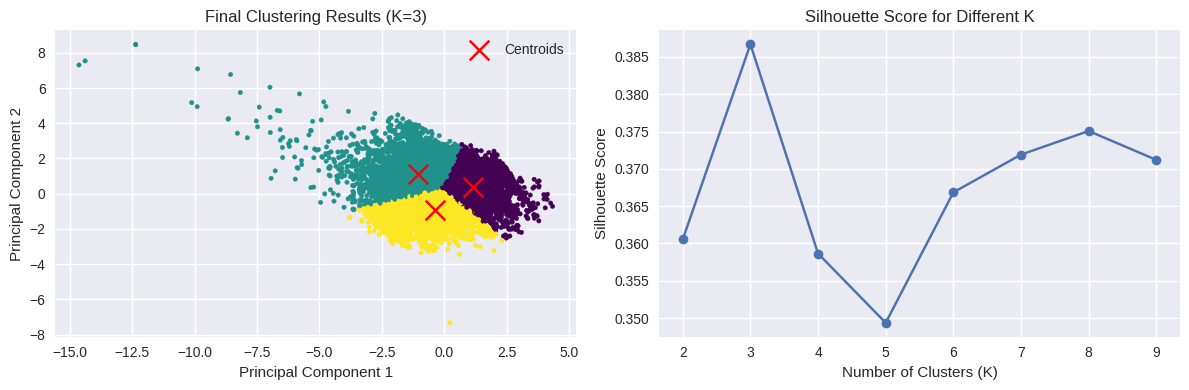


Clustering Evaluation (for chosen K):
Inertia: 48179.64
Silhouette Score: 0.39


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Create elbow plot
    plt.figure(figsize=(8, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(K)
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
print("Plotting elbow curve...")
inertias = plot_elbow_curve(X_pca)


# Apply final clustering
# Based on the elbow curve, choose an appropriate number of clusters. Let's start with 3.
optimal_k = 3
kmeans = KMeansClustering(n_clusters=optimal_k)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title(f'Final Clustering Results (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Plot evaluation metrics (Silhouette Score)
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K_range = range(2, 10) # Silhouette score is not defined for k=1
for k in K_range:
    kmeans_eval = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_eval = kmeans_eval.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels_eval)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)


plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics for the chosen k
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation (for chosen K):")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


CLUSTER SIZE DISTRIBUTION


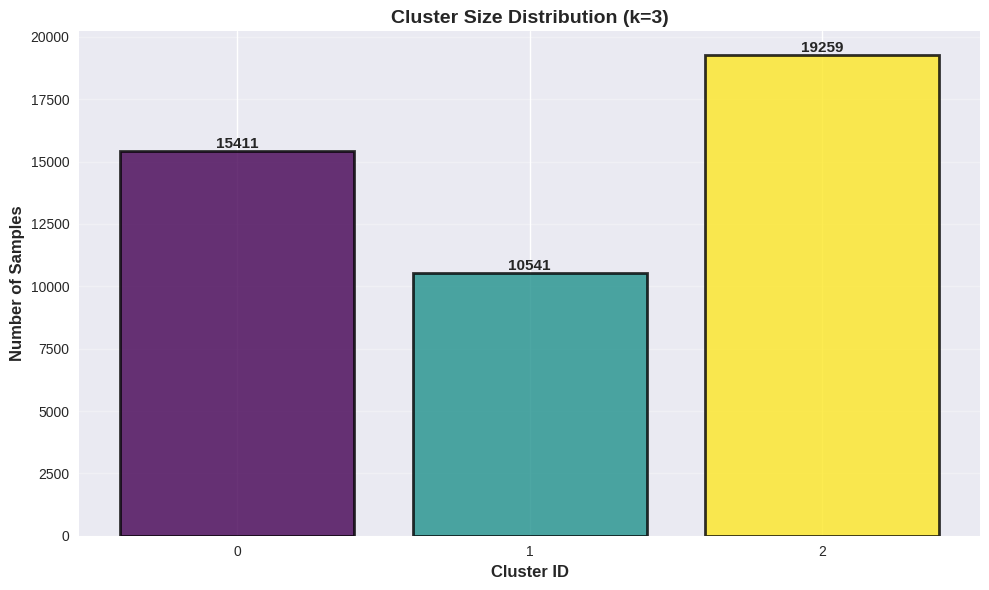


SILHOUETTE SCORE DISTRIBUTION PER CLUSTER


/tmp/ipython-input-2596663316.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(silhouette_data, labels=range(3), patch_artist=True,


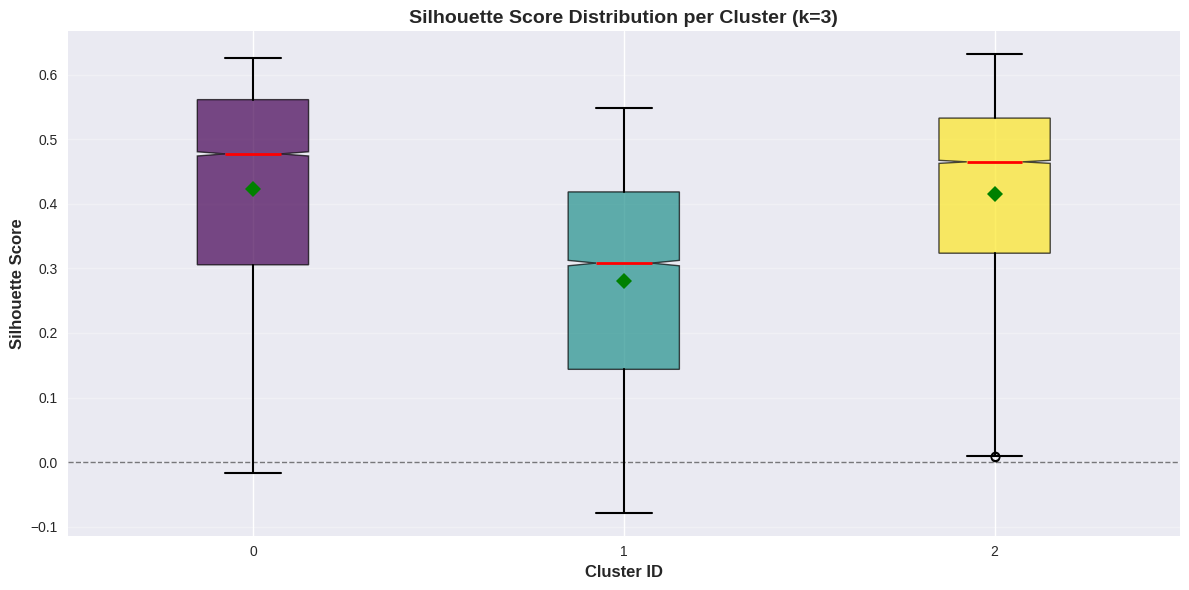

In [18]:
print("\n" + "="*70)
print("CLUSTER SIZE DISTRIBUTION")
print("="*70)

cluster_sizes = np.bincount(kmeans.labels)
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes)))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(cluster_sizes)), cluster_sizes, color=colors_bar,
              edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title(f'Cluster Size Distribution (k={3})', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(cluster_sizes)))
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# SILHOUETTE DISTRIBUTION PER CLUSTER (Box Plot)
# ============================================================
print("\n" + "="*70)
print("SILHOUETTE SCORE DISTRIBUTION PER CLUSTER")
print("="*70)

from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for box plot
silhouette_data = [silhouette_vals[kmeans.labels == i] for i in range(3)]

# Create box plot
bp = ax.boxplot(silhouette_data, labels=range(3), patch_artist=True,
                 notch=True, showmeans=True,
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2),
                 meanprops=dict(marker='D', markerfacecolor='green', markersize=8),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5))

# Color each box differently
colors = plt.cm.viridis(np.linspace(0, 1, 3))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax.set_title(f'Silhouette Score Distribution per Cluster (k={3})',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(range(1,4))

plt.tight_layout()
plt.show()


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [14]:

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples, dtype=int)
        current_num_clusters = 1
        next_new_label = 1 # Label for the next new cluster to be created

        # Initialize the first centroid (mean of all data points)
        self.centers_[0] = np.mean(X, axis=0)

        while current_num_clusters < self.n_clusters:
            # 1. Select a cluster to split: choose the largest cluster by size
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster_label = unique_labels[np.argmax(counts)]
            points_in_largest_cluster = X[self.labels_ == largest_cluster_label]

            # If the cluster to be split is empty (shouldn't happen with largest_cluster logic normally)
            if len(points_in_largest_cluster) == 0:
                break

            # 2. Run a binary KMeans (k=2) on the points in that cluster
            binary_kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            binary_labels = binary_kmeans.fit_predict(points_in_largest_cluster)

            # 3. Assign new labels
            # The points previously assigned to largest_cluster_label will now be split.
            # One new sub-cluster keeps the original largest_cluster_label.
            # The other sub-cluster gets a new label.
            new_label_for_second_child = next_new_label
            next_new_label += 1

            # Update labels_ array
            # Find indices of points belonging to the largest_cluster_label
            indices_to_update = np.where(self.labels_ == largest_cluster_label)[0]

            # Assign new labels based on binary_labels
            # One part keeps the original label, the other gets a new label
            self.labels_[indices_to_update[binary_labels == 1]] = new_label_for_second_child

            # 4. Record split metadata (optional, but good for understanding)
            self.split_tree[largest_cluster_label] = (
                largest_cluster_label, # The part that kept the original label
                new_label_for_second_child # The new cluster label
            )

            # Update centroids for the split clusters
            self.centers_[largest_cluster_label] = binary_kmeans.cluster_centers_[0]
            self.centers_[new_label_for_second_child] = binary_kmeans.cluster_centers_[1]

            current_num_clusters += 1

        # Ensure all existing cluster labels have a centroid, recompute for final accuracy
        final_unique_labels = np.unique(self.labels_)
        final_centroids = np.zeros((len(final_unique_labels), X.shape[1]))
        for i, label in enumerate(final_unique_labels):
            points_in_cluster = X[self.labels_ == label]
            if len(points_in_cluster) > 0:
                final_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                # This case should ideally not happen if labels are handled correctly
                # but as a safeguard, we can use a previously stored centroid or mean of X
                if label in self.centers_:
                    final_centroids[i] = self.centers_[label]
                else:
                    final_centroids[i] = np.mean(X, axis=0) # Fallback
        self.centers_ = {label: centroid for label, centroid in zip(final_unique_labels, final_centroids)}

        return self.labels_


# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)



📈 Bisecting K-Means Evaluation:
Inertia: 55200.33
Silhouette Score: 0.34

Cluster Size Distribution:
 - Cluster 0: 20434 samples
 - Cluster 1: 16348 samples
 - Cluster 2: 8429 samples


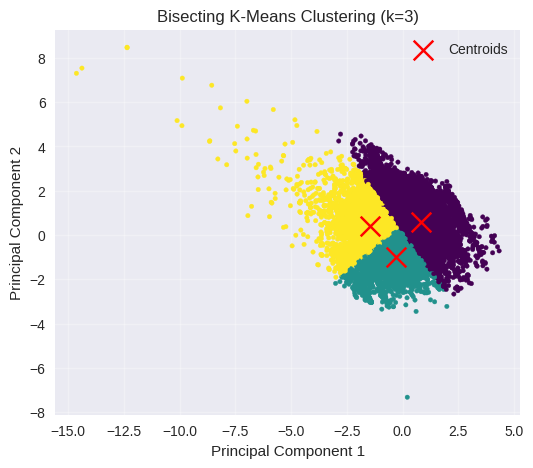

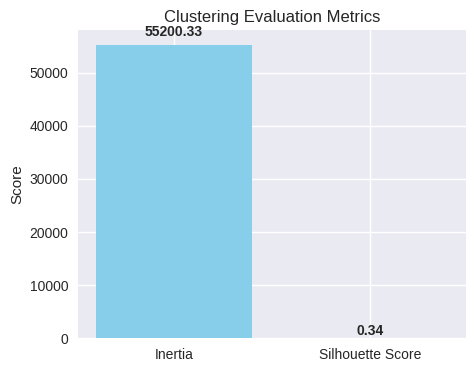

/tmp/ipython-input-3519561776.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=sil_samples, palette='viridis')


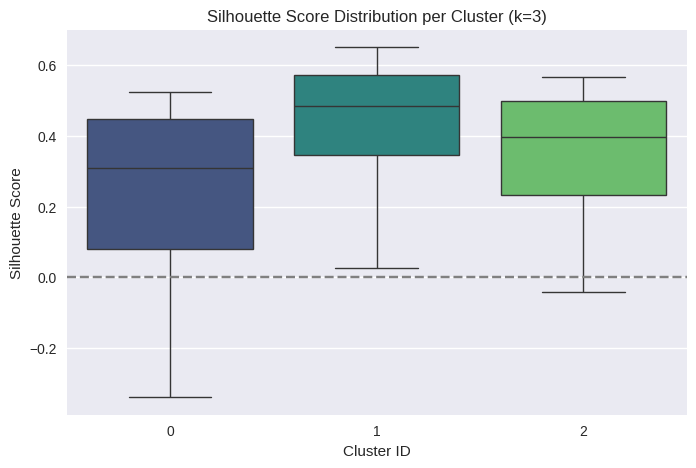

/tmp/ipython-input-3519561776.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=counts, palette='viridis')


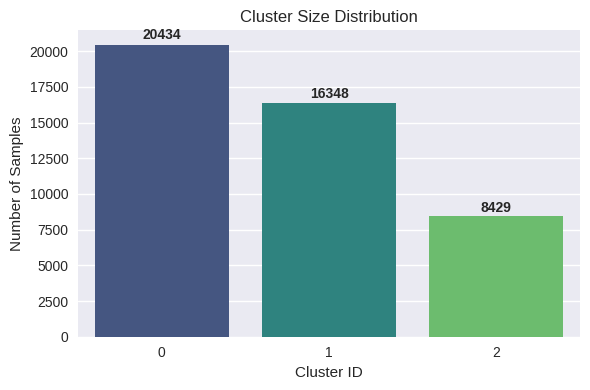

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

# -----------------------------
# Run Bisecting K-Means
# -----------------------------
bisect = BisectingKMeans(n_clusters=3, random_state=42)
labels = bisect.fit_predict(X_pca)

# Retrieve centroids
centroids = np.array([bisect.centers_[k] for k in sorted(bisect.centers_.keys())])

# -----------------------------
# Compute Evaluation Metrics
# -----------------------------
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
    return inertia

inertia = calculate_inertia(X_pca, labels, centroids)

unique_labels, counts = np.unique(labels, return_counts=True)
if len(unique_labels) > 1:
    silhouette = silhouette_score(X_pca, labels)
else:
    silhouette = np.nan

print("\n📈 Bisecting K-Means Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}" if not np.isnan(silhouette) else "Silhouette Score: N/A")
print("\nCluster Size Distribution:")
for lbl, count in zip(unique_labels, counts):
    print(f" - Cluster {lbl}: {count} samples")

# -----------------------------
# Plot 1: Final Clustering Results
# -----------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title(f"Bisecting K-Means Clustering (k={bisect.n_clusters})")
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# Plot 2: Evaluation Metrics (bar chart)
# -----------------------------
plt.figure(figsize=(5, 4))
plt.bar(['Inertia', 'Silhouette Score'], [inertia, silhouette if not np.isnan(silhouette) else 0],
        color=['skyblue', 'lightgreen'])
plt.title("Clustering Evaluation Metrics")
plt.ylabel("Score")

# Add value labels
for i, v in enumerate([inertia, silhouette if not np.isnan(silhouette) else 0]):
    plt.text(i, v + (0.02 * v if v != 0 else 0.1), f"{v:.2f}",
             ha='center', va='bottom', fontweight='bold')
plt.show()

# -----------------------------
# Plot 3: Silhouette Distribution per Cluster (boxplot)
# -----------------------------
if len(unique_labels) > 1:
    sil_samples = silhouette_samples(X_pca, labels)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=labels, y=sil_samples, palette='viridis')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Silhouette Score Distribution per Cluster (k={bisect.n_clusters})")
    plt.xlabel("Cluster ID")
    plt.ylabel("Silhouette Score")
    plt.show()

# -----------------------------
# Plot 4: Cluster Size Distribution
# -----------------------------
plt.figure(figsize=(6, 4))
sns.barplot(x=unique_labels, y=counts, palette='viridis')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")

# Add labels on bars
for i, v in enumerate(counts):
    plt.text(i, v + (0.01 * v), f"{v}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!